# Basic operations on pointclouds

This notebook discusses the basic structure of a pointcloud and details its most common attributes.

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

## What is a pointcloud?

In general terms, a pointcloud refers to a set of data points in space (this space may have multiple and inhomogeneous dimensions such as time, temperature, distance, etc.). We assume here a three-dimensional space where **a pointcloud is a representation of a shape or an object** (or pieces of one or several objects).

Pointclouds may be obtained from real objects (through "3D scanning" processes), from digital objects (through "3D modeling" processes), or even created from scratch. This results in the multiplication of available data, but also formats, each one being tailored for specific uses and software.

For the sake of simplicity, this notebook uses an ASCII-based format (i.e., a plain text file that uses whitespaces to separate values and newlines to separate records). Note that more complex binary formats (such as PLY, LAS, or E57) must be privileged for large pointclouds.

A pointcloud is then simply loaded using Numpy:

In [2]:
points = np.loadtxt("./data/stanford_bunny_simple.xyz")
print("Here is the content of our pointcloud:\n", points)
print("Its shape is:", points.shape)

Here is the content of our pointcloud:
 [[-25.5861 106.9803  42.684 ]
 [-30.1628  93.312  -47.9823]
 [ -8.5167 100.3486  73.1544]
 ...
 [ 39.3746 100.979   -1.1485]
 [-54.9932  84.2855 -32.3682]
 [-77.221  104.7658 -26.0204]]
Its shape is: (4096, 3)


We can see that **a pointcloud** (usually noted $p$) **is basically a "list" of points** (the notion of set is more appropriate in theory) defined by their cartesian coordinates (i.e., their position from the origin according to the x, y, and z axes).

Here data are stored in a Numpy array, which is better than a mere list for numerical operations. Points are usually listed *row-wise* (one point per line), resulting in a vector of shape $(n, 3)$ ($n$ being the total number of points), although the contrary (i.e., *column-wise*) is also found.

Points may be visualized using Matplotlib if their number is not too large (otherwise other libraries or dedicated software may be needed). Note the **sparse** (some areas of the object may not be sampled), **irregular** (some areas may have different densities), and **unordered** (the "order" of points is not important) nature of pointclouds.

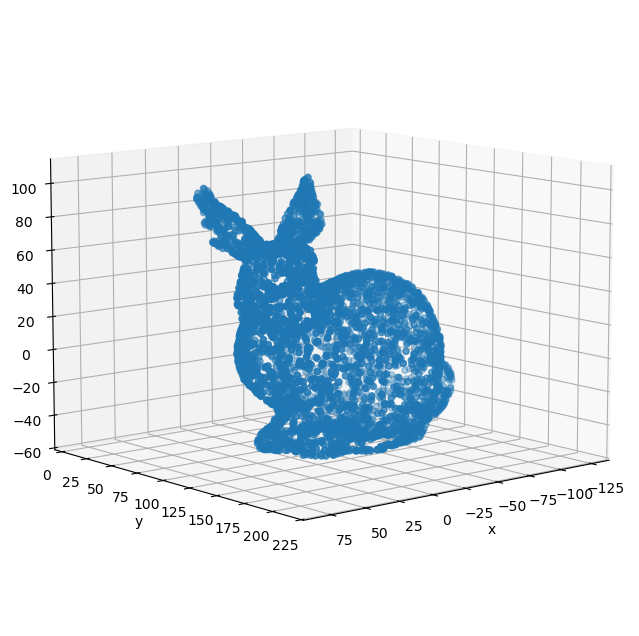

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 50)
plt.axis("equal")
plt.show()



## Common attributes

As seen before, each point of the pointcloud has *a minima* three coordinates (x, y, and z). However, it is not uncommon to find other information. Among **the most popular ones are normals, colors, and scalar fields**.

In practice, additional coordinates are added to the points' position, making the pointcloud a vector of shape $(m, n)$, with $m \geq 3$. It is however recommended to "group" each kind of information in a separate vector (e.g., one for position, one for normals, one for colors, etc.).


In [4]:
data = np.loadtxt("./data/stanford_bunny_custom.xyz")
print("Here is the shape of our data:", data.shape)
points = data[:, :3]
normals = data[:, 3:6]
colors = data[:, 6:9]
scalar = data[:, -1]

Here is the shape of our data: (4096, 10)


### Normals

**A normal is a vector that is assumed to be perpendicular to the sampled surface** at a given point. 

A normal vector $n_i$ associated to a point $p_i$ has three components, noted $n_{ix}$, $n_{iy}$, and $n_{iz}$. It is generally a unit vector, which means that its norm is equal to one, $||n_i|| = 1$.

Normals are sometimes given directly by the acquisition device or may be easily calculated when the sampled surface is known (if a pointcloud comes from a CAD model for example). When this is not the case, normals can be estimated by various methods (we'll get to it in a next notebook).

In practice, similar to points, normals are usually given in a vector of shape $(n, 3)$ ($n$ being the total number of points).

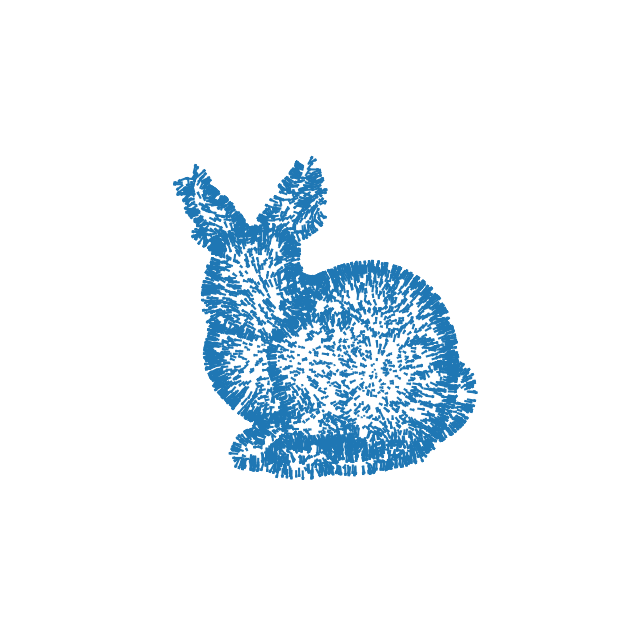

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.quiver(points[:, 0], points[:, 1], points[:, 2],
          5.*normals[:, 0], 5.*normals[:, 1], 5.*normals[:, 2]) # we make normals a little bit larger for visualization purposes
ax.view_init(10, 60)
ax.set_axis_off()
plt.axis("equal")
plt.show()

Normals provide useful local information about the geometrical properties of the sampled surface or object. In particular, normals help define the notion of "interior/exterior" (normals are supposed to be pointing "outside" by convention).

Normals are used as inputs in many pointcloud processing algorithms, but also for visualization/rendering purposes. Computing the angle between an incident ray and the normals is a first approach to simulating the reflection of light on a given object, as shown below.

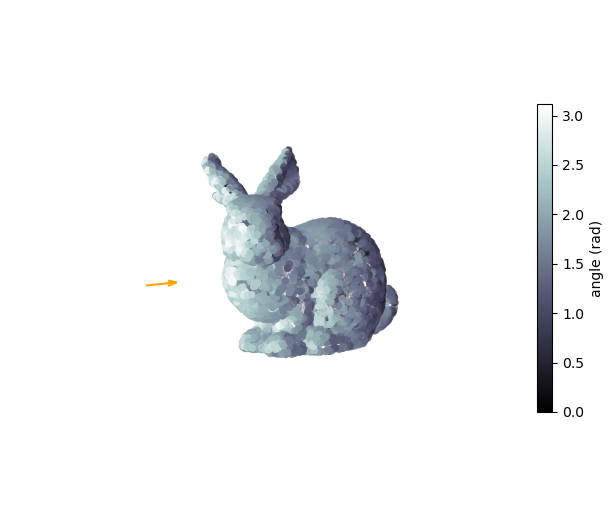

In [7]:
# Incident ray (unit vector giving the direction of light)
v_dir = np.array([-1., 0., 0.])

# Angle between the normals and the incident ray
theta = np.arccos(normals @ v_dir)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(points[:, 0], points[:, 1], points[:, 2],
          c=theta, cmap="bone")
v_mag =  np.linalg.norm(v_dir * np.ptp(points))/10 # used for visualization purposes: magnitude
v_loc = points.mean(axis=0) - 5 * v_mag * v_dir # used for visualization purposes: position
ax.quiver(v_loc[0], v_loc[1], v_loc[2], v_mag*v_dir[0], v_mag*v_dir[1], v_mag*v_dir[2],
          color='orange')

ax.view_init(10, 60)
ax.set_axis_off()
cbar = fig.colorbar(p, shrink=0.5)
cbar.set_label('angle (rad)')
plt.axis("equal")
plt.show()

### Colors

Colors are more easily defined and account for the visual appearance of each point.

There are several ways to define colors, one of the most common is **the RGB color model that defines a color as an addition of the red, green and blue** primary colors.

A RGB color vector associated to a point $p_i$ has three components, noted R, G, and B, with values generally ranging from 0 to 255 (integers) or from 0 to 1 (floats).

Colors are sometimes given by the acquisition device or may be easily deduced if the pointcloud comes from a colored virtual object. However, in the first case, color values may vary to the acquisition conditions (the lighting in particular).

In practice, similar to points and normals, colors are usually given in a vector of shape $(n, 3)$ ($n$ being the total number of points).

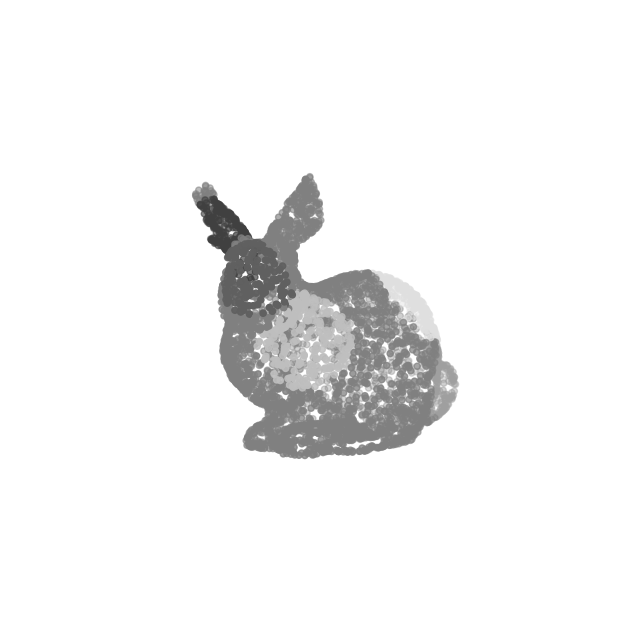

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           c=colors) # RGB values need to be normalized in Matplotlib
ax.view_init(10, 60)
ax.set_axis_off()
plt.axis("equal")
plt.show()

### Scalar fields

In general terms, a scalar field is a function associating a single number to every point in a space. Here it simply designates **a number associated with a point**.

This number may have any value and dimension.

Scalar fields are sometimes given by the acquisition device or may result of a calculation. In practice, a scalar field is used to associate any quantity of interest with the pointcloud.

In practice, a scalar fied is usually given in a vector of shape $(n, 1)$ ($n$ being the total number of points). There may be several scalar fields associated with a given pointcloud.

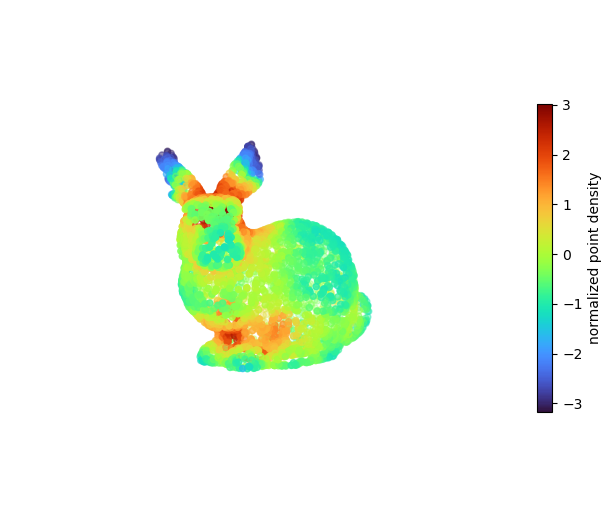

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           c=scalar, cmap="turbo")
ax.view_init(10, 60)
ax.set_axis_off()
cbar = fig.colorbar(p, shrink=0.5)
cbar.set_label('normalized point density')
plt.axis("equal")
plt.show()

## Wrapping up

You should now have a better grasp of what a pointcloud is. These fundamentals are needed to deal with the more advanced processing algorithms that are discussed in the next notebooks.

One key takeaway is that pointclouds represents a shape in a quite simple manner, as sets of 3D points in space, possibly with additional attributes such as normals, colors, etc. This means that the "order" in which the points are listed is in practice unimportant and it also underlines the discrete nature of this kind of representation.

Another more practical key takeaway it that pointcloud may be manipulated quite simply using Numpy and visualized with Matplotlib (should the number of points be in the thousand range for the latter). Vectorization is key to keep the code both readable and efficient (as a rule of thumb, try to avoid for loops as much as you can).

However, as mentioned before, pointclouds are unordered (e.g., as opposed to meshes, for which connections exist between vertices) which make some more advanced calculations more difficult. This is why spatial structures are often built to compensate for this lack of order. This is the subject of a next notebook.